# Document Layout Analysis

Natural PDF can automatically detect the structure of a document (titles, paragraphs, tables, figures) using layout analysis models. This guide shows how to use this feature.

## Setup

We'll use a sample PDF that includes various layout elements.

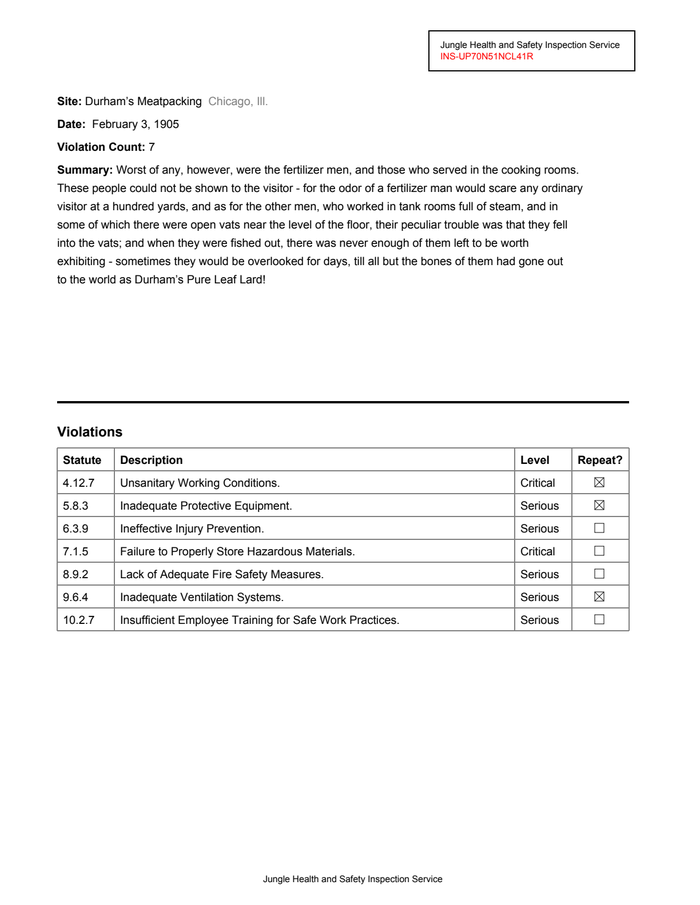

In [1]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

page.to_image(width=700)

## Running Basic Layout Analysis

Use the `analyze_layout()` method. By default, it uses the YOLO model.

In [2]:
# Analyze the layout using the default engine (YOLO)
# This adds 'region' elements to the page
page.analyze_layout()

image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmpj6dk8rwe/temp_layout_image.png: 1024x800 1 title, 3 plain texts, 2 abandons, 1 table, 3252.1ms


Speed: 5.4ms preprocess, 3252.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 800)


<ElementCollection[Region](count=7)>

In [3]:
# Find all detected regions
regions = page.find_all('region')
len(regions) # Show how many regions were detected

7

In [4]:
first_region = regions[0]
f"First region: type='{first_region.type}', confidence={first_region.confidence:.2f}"

"First region: type='abandon', confidence=0.81"

## Visualizing Detected Layout

Use `highlight()` or `show()` on the detected regions.

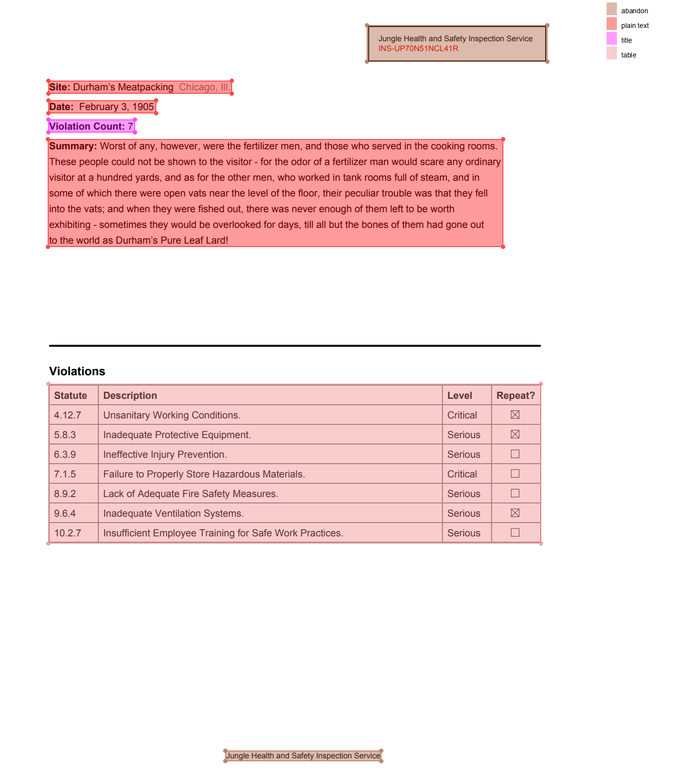

In [5]:
# Highlight all detected regions, colored by type
regions.highlight(group_by='type')
page.to_image(width=700)

## Finding Specific Region Types

Use attribute selectors to find regions of a specific type.

In [6]:
# Find all detected titles
titles = page.find_all('region[type=title]')
titles

<ElementCollection[Region](count=1)>

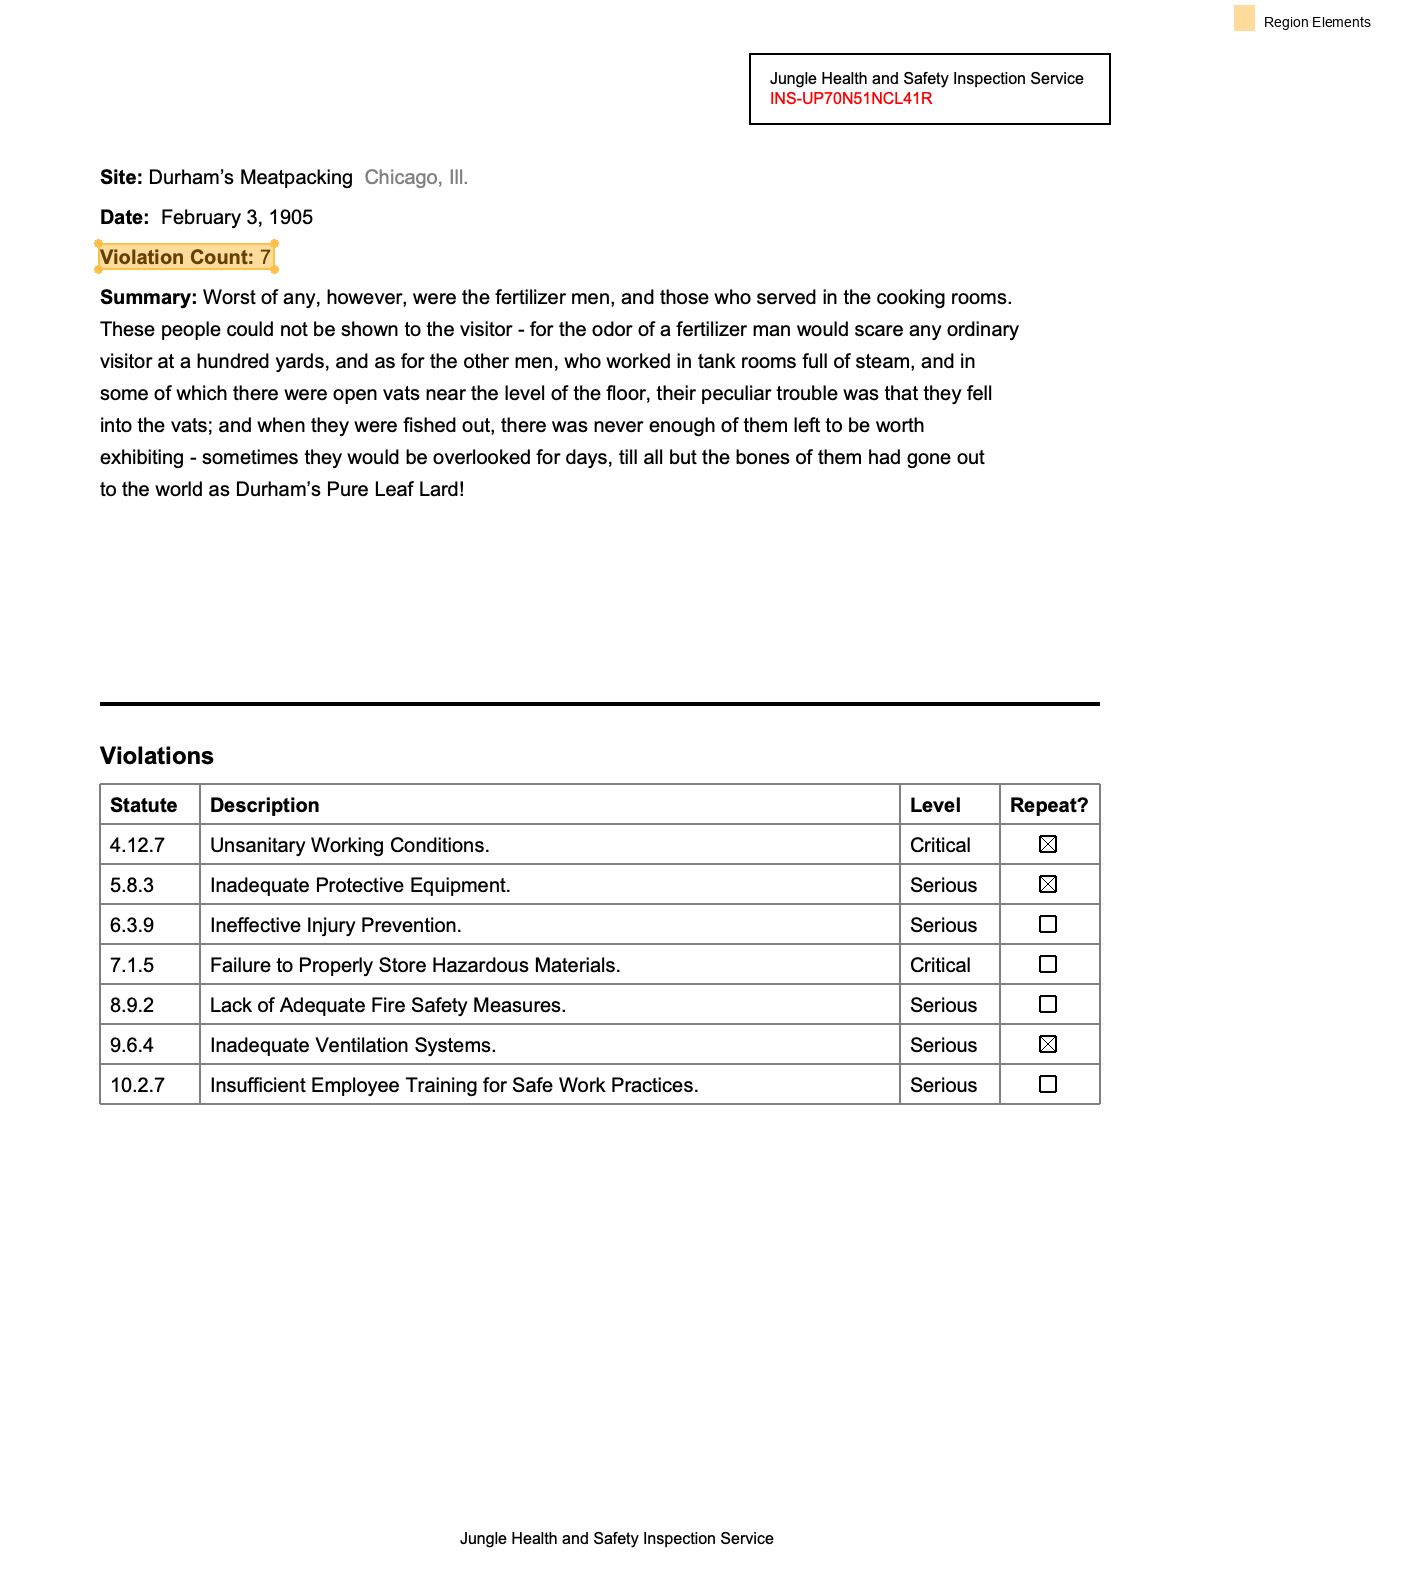

In [7]:
titles.show()

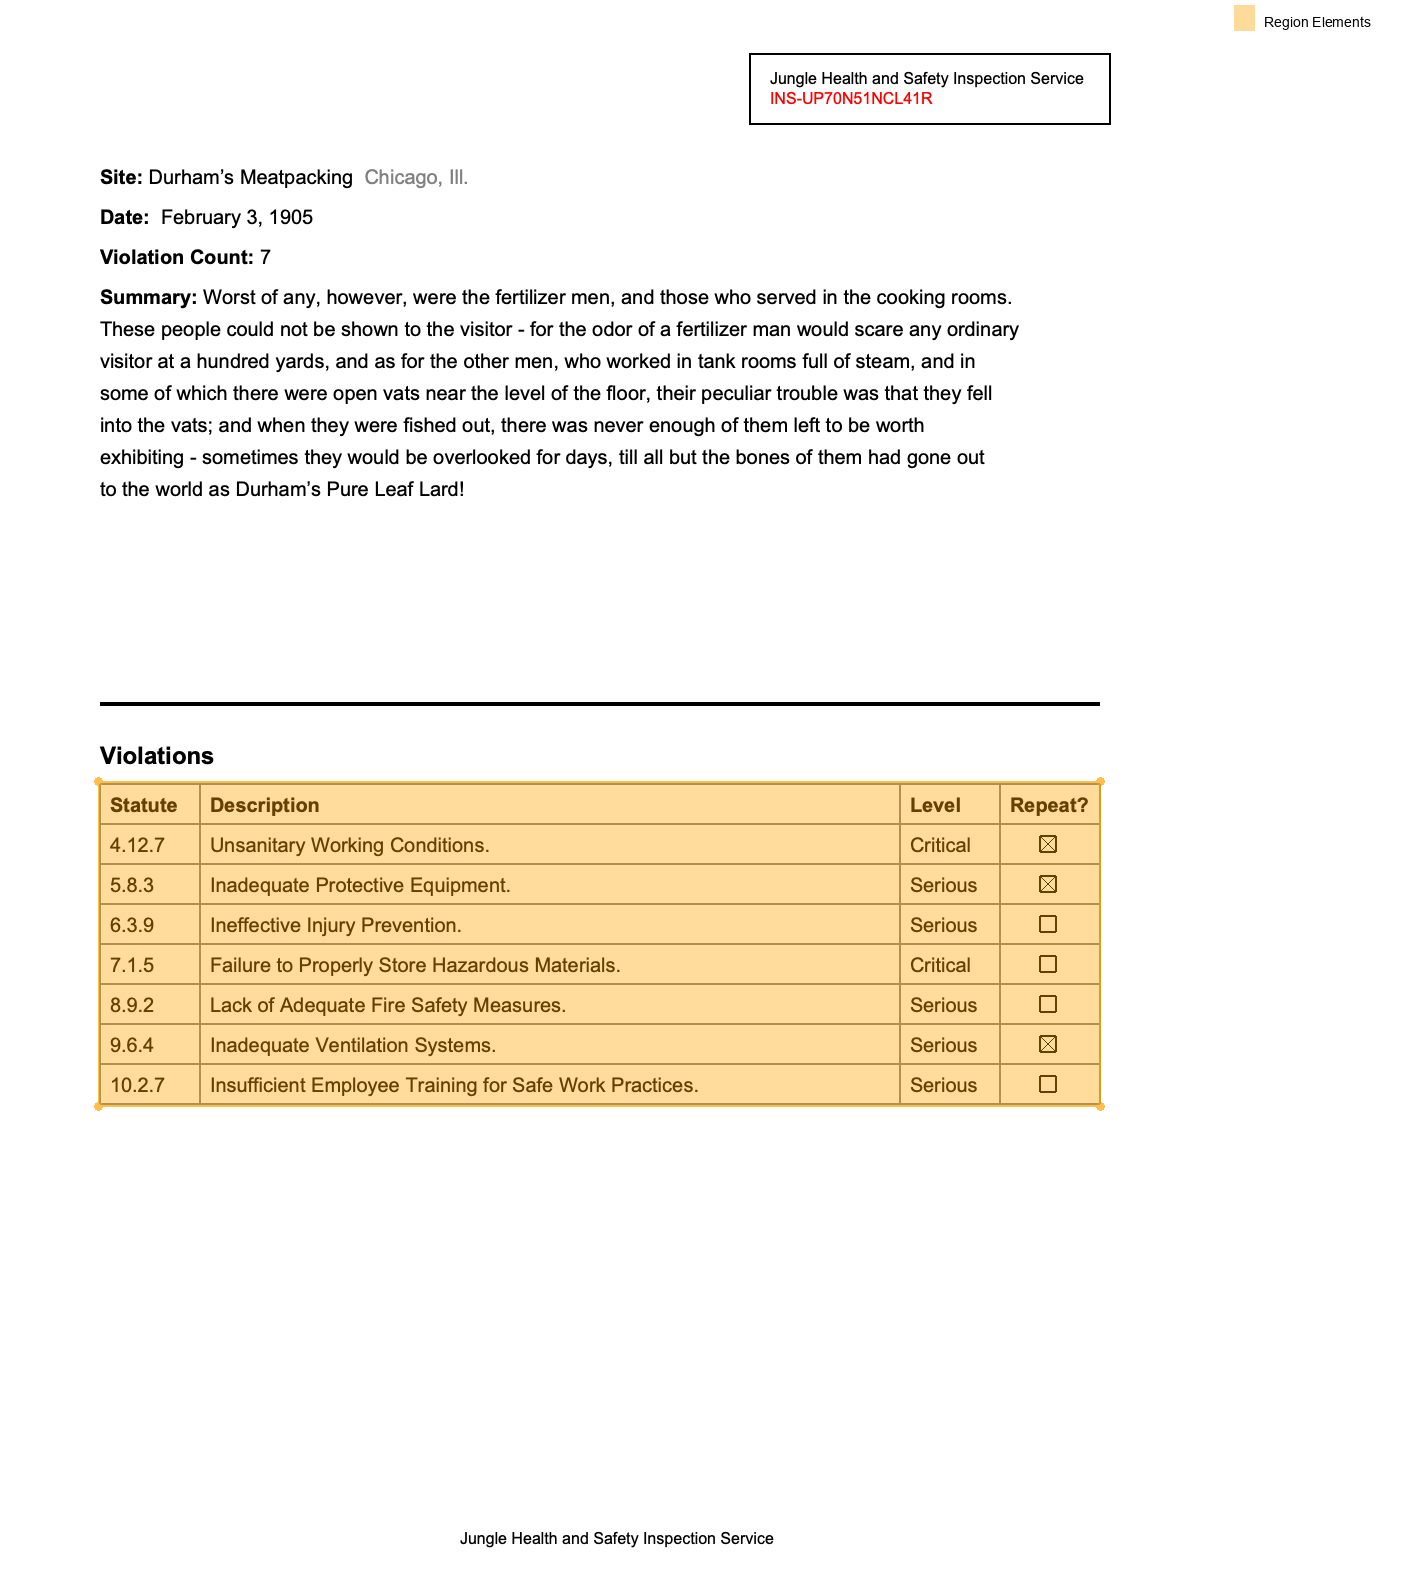

In [8]:
page.find_all('region[type=table]').show()

## Working with Layout Regions

Detected regions are like any other `Region` object. You can extract text, find elements within them, etc.

In [9]:
page.find('region[type=table]').extract_text(layout=True)

'Statute Description Level Repeat?\n4.12.7 Unsanitary Working Conditions. Critical\n5.8.3 Inadequate Protective Equipment. Serious\n6.3.9 Ineffective Injury Prevention. Serious\n7.1.5 Failure to Properly Store Hazardous Materials. Critical\n8.9.2 Lack of Adequate Fire Safety Measures. Serious\n9.6.4 Inadequate Ventilation Systems. Serious\n10.2.7 Insufficient Employee Training for Safe Work Practices. Serious'

## Using Different Layout Models

Natural PDF supports multiple engines (`yolo`, `paddle`, `tatr`). Specify the engine when calling `analyze_layout`.

*Note: Using different engines requires installing the corresponding extras (e.g., `natural-pdf[layout_paddle]`).* `yolo` is the default.

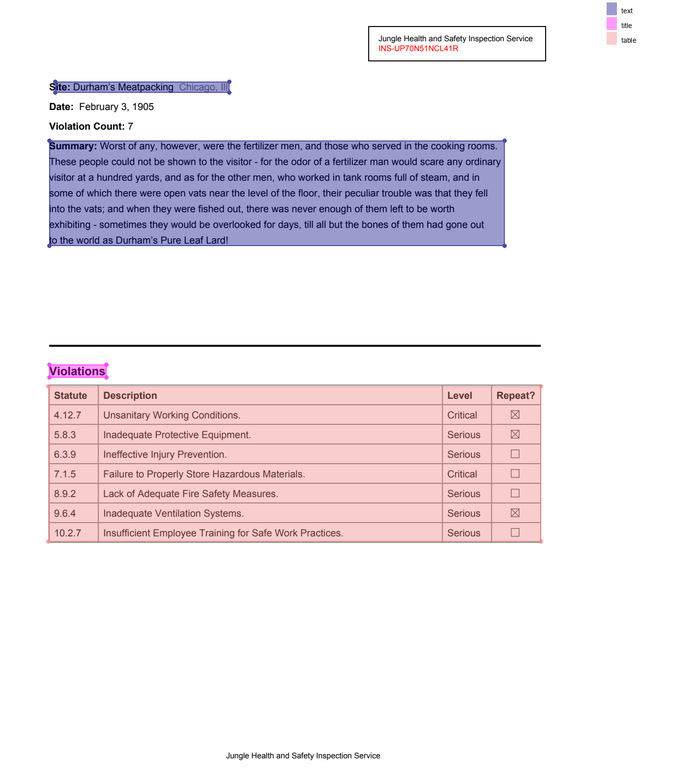

In [10]:
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="paddle")
page.find_all('region[model=paddle]').highlight(group_by='region_type')
page.to_image(width=700)

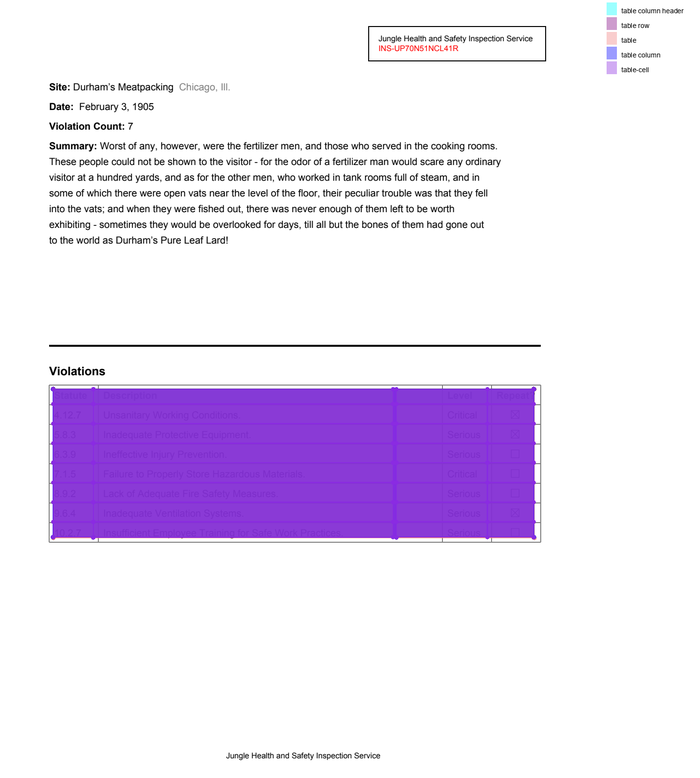

In [11]:
# Analyze using Table Transformer (TATR) - specialized for tables
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="tatr")
page.find_all('region[model=tatr]').highlight(group_by='region_type')
page.to_image(width=700)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/docling.py:108 in               │
│ _load_model_from_options                                                                         │
│                                                                                                  │
│   105 │   │   │   # Pass device if converter accepts it, otherwise handle via extra_args         │
│   106 │   │   │   converter_args = options.extra_args.copy()                                     │
│   107 │   │   │                                                                                  │
│ ❱ 108 │   │   │   converter = DocumentConverter(**converter_args)                                │
│   109 │   │   │   self.logger.info("Docling DocumentConverter initialized.")                     │
│   110 │   │   │   return converter                                                               │
│   111 │   │   except Exception as e:                                                             │
│                                                                                                  │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │ converter_args = {                                                                           │ │
│ │                  │   'model_name': None,                                                     │ │
│ │                  │   '_page_ref': <Page number=1 index=0>,                                   │ │
│ │                  │   '_img_scale_x': 1.0,                                                    │ │
│ │                  │   '_img_scale_y': 1.0                                                     │ │
│ │                  }                                                                           │ │
│ │              e = TypeError("DocumentConverter.__init__() got an unexpected keyword argument  │ │
│ │                  'model_name'")                                                              │ │
│ │        options = DoclingLayoutOptions(                                                       │ │
│ │                  │   confidence=0.5,                                                         │ │
│ │                  │   classes=None,                                                           │ │
│ │                  │   exclude_classes=None,                                                   │ │
│ │                  │   device='cpu',                                                           │ │
│ │                  │   extra_args={                                                            │ │
│ │                  │   │   'model_name': None,                                                 │ │
│ │                  │   │   '_page_ref': <Page number=1 index=0>,                               │ │
│ │                  │   │   '_img_scale_x': 1.0,                                                │ │
│ │                  │   │   '_img_scale_y': 1.0                                                 │ │
│ │                  │   },                                                                      │ │
│ │                  │   verbose=False                                                           │ │
│ │                  )                                                                           │ │
│ │           self = <natural_pdf.analyzers.layout.docling.DoclingLayoutDetector object at       │ │
│ │                  0x36752d8d0>                                                                │ │
│ ╰──────────────────────────────────────────────────────────────────────────────────────────────╯ │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: DocumentConverter.__init__() got an unexpected keyword argument 'model_name'

2025-05-06T15:29:34.923747Z [error    ] Failed to initialize Docling DocumentConverter: DocumentConverter.__init__() got an unexpected keyword argument 'model_name' lineno=112 module=natural_pdf.analyzers.layout.base.DoclingLayoutDetector



[2025-05-06 11:29:34,923] [   ERROR] docling.py:112 - Failed to initialize Docling DocumentConverter: DocumentConverter.__init__() got an unexpected keyword argument 'model_name'
Traceback (most recent call last):
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/docling.py", line 108, in _load_model_from_options
    converter = DocumentConverter(**converter_args)
TypeError: DocumentConverter.__init__() got an unexpected keyword argument 'model_name'


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/base.py:95 in _get_model        │
│                                                                                                  │
│    92 │   │   │   │   # Ensure dependencies are met before loading                               │
│    93 │   │   │   │   if not self.is_available():                                                │
│    94 │   │   │   │   │   raise RuntimeError(f"{self.__class__.__name__} dependencies are not    │
│ ❱  95 │   │   │   │   self._model_cache[cache_key] = self._load_model_from_options(options)      │
│    96 │   │   │   │   self.logger.info(f"Model loaded successfully for key: {cache_key}")        │
│    97 │   │   │   except Exception as e:                                                         │
│    98 │   │   │   │   self.logger.error(f"Failed to load model for key {cache_key}: {e}", exc_   │
│                                                                                                  │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │ cache_key = 'DoclingLayoutDetector_cpu_-7046143099756264444'                                 │ │
│ │         e = TypeError("DocumentConverter.__init__() got an unexpected keyword argument       │ │
│ │             'model_name'")                                                                   │ │
│ │   options = DoclingLayoutOptions(                                                            │ │
│ │             │   confidence=0.5,                                                              │ │
│ │             │   classes=None,                                                                │ │
│ │             │   exclude_classes=None,                                                        │ │
│ │             │   device='cpu',                                                                │ │
│ │             │   extra_args={                                                                 │ │
│ │             │   │   'model_name': None,                                                      │ │
│ │             │   │   '_page_ref': <Page number=1 index=0>,                                    │ │
│ │             │   │   '_img_scale_x': 1.0,                                                     │ │
│ │             │   │   '_img_scale_y': 1.0                                                      │ │
│ │             │   },                                                                           │ │
│ │             │   verbose=False                                                                │ │
│ │             )                                                                                │ │
│ │      self = <natural_pdf.analyzers.layout.docling.DoclingLayoutDetector object at            │ │
│ │             0x36752d8d0>                                                                     │ │
│ ╰──────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                  │
│ /Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/docling.py:108 in               │
│ _load_model_from_options                                                                         │
│                                                                                                  │
│   105 │   │   │   # Pass device if converter accepts it, otherwise handle via extra_args         │
│   106 │   │   │   converter_args = options.extra_args.copy()                                     │
│   107 │   │   │                                                                                  │
│ ❱ 108 │   │   │   converter = DocumentConverter(**converter_args)                                │
│   109 │   │   │   self.logger.info("Docling DocumentConvert

2025-05-06T15:29:34.974624Z [error    ] Failed to load model for key DoclingLayoutDetector_cpu_-7046143099756264444: DocumentConverter.__init__() got an unexpected keyword argument 'model_name' lineno=98 module=natural_pdf.analyzers.layout.base.DoclingLayoutDetector



[2025-05-06 11:29:34,974] [   ERROR] base.py:98 - Failed to load model for key DoclingLayoutDetector_cpu_-7046143099756264444: DocumentConverter.__init__() got an unexpected keyword argument 'model_name'
Traceback (most recent call last):
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/base.py", line 95, in _get_model
    self._model_cache[cache_key] = self._load_model_from_options(options)
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/docling.py", line 108, in _load_model_from_options
    converter = DocumentConverter(**converter_args)
TypeError: DocumentConverter.__init__() got an unexpected keyword argument 'model_name'


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/layout_manager.py:177 in        │
│ analyze_layout                                                                                   │
│                                                                                                  │
│   174 │   │   │   engine_instance = self._get_engine_instance(selected_engine_name)              │
│   175 │   │   │   logger.info(f"Analyzing layout with engine '{selected_engine_name}'...")       │
│   176 │   │   │                                                                                  │
│ ❱ 177 │   │   │   detections = engine_instance.detect(image, options)  # Pass options directly   │
│   178 │   │   │                                                                                  │
│   179 │   │   │   logger.info(f"Layout analysis complete. Found {len(detections)} regions.")     │
│   180 │   │   │   return detections                                                              │
│                                                                                                  │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │                    e = TypeError("DocumentConverter.__init__() got an unexpected keyword     │ │
│ │                        argument 'model_name'")                                               │ │
│ │       engine_context = " for engine 'docling'"                                               │ │
│ │      engine_instance = <natural_pdf.analyzers.layout.docling.DoclingLayoutDetector object at │ │
│ │                        0x36752d8d0>                                                          │ │
│ │         found_engine = True                                                                  │ │
│ │                image = <PIL.Image.Image image mode=RGB size=612x792 at 0x36752D510>          │ │
│ │                 name = 'docling'                                                             │ │
│ │              options = DoclingLayoutOptions(                                                 │ │
│ │                        │   confidence=0.5,                                                   │ │
│ │                        │   classes=None,                                                     │ │
│ │                        │   exclude_classes=None,                                             │ │
│ │                        │   device='cpu',                                                     │ │
│ │                        │   extra_args={                                                      │ │
│ │                        │   │   'model_name': None,                                           │ │
│ │                        │   │   '_page_ref': <Page number=1 index=0>,                         │ │
│ │                        │   │   '_img_scale_x': 1.0,                                          │ │
│ │                        │   │   '_img_scale_y': 1.0                                           │ │
│ │                        │   },                                                                │ │
│ │                        │   verbose=False                                                     │ │
│ │                        )                                                                     │ │
│ │       registry_entry = {                                                                     │ │
│ │                        │   'class': <class                                                   │ │
│ │                        'natural_pdf.analyzers.layout.docling.DoclingLayoutDetector'>,        │ │
│ │                        │   'options_class': <class                                           │ │
│ │                        'natural_pdf.analyzers.layout.layout_options.DoclingLayoutOptions'>   │ │
│ │                        }                                 

2025-05-06T15:29:35.020500Z [error    ] Layout analysis failed for engine 'docling': DocumentConverter.__init__() got an unexpected keyword argument 'model_name' lineno=185 module=natural_pdf.analyzers.layout.layout_manager



[2025-05-06 11:29:35,020] [   ERROR] layout_manager.py:185 - Layout analysis failed for engine 'docling': DocumentConverter.__init__() got an unexpected keyword argument 'model_name'
Traceback (most recent call last):
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/layout_manager.py", line 177, in analyze_layout
    detections = engine_instance.detect(image, options)  # Pass options directly
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/docling.py", line 139, in detect
    converter = self._get_model(options)
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/base.py", line 95, in _get_model
    self._model_cache[cache_key] = self._load_model_from_options(options)
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/docling.py", line 108, in _load_model_from_options
    converter = DocumentConverter(**converter_args)
TypeError: DocumentConverter.__init__() got an unexpected keyword argument 'm

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/layout_analyzer.py:214 in       │
│ analyze_layout                                                                                   │
│                                                                                                  │
│   211 │   │   logger.debug(f"Calling Layout Manager with final options object.")                 │
│   212 │   │   try:                                                                               │
│   213 │   │   │   # ALWAYS pass the constructed/modified options object                          │
│ ❱ 214 │   │   │   detections = self._layout_manager.analyze_layout(                              │
│   215 │   │   │   │   image=std_res_page_image,                                                  │
│   216 │   │   │   │   options=final_options,  # Pass the final object with internal context      │
│   217 │   │   │   )                                                                              │
│                                                                                                  │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │      base_defaults = BaseLayoutOptions(                                                      │ │
│ │                      │   confidence=0.5,                                                     │ │
│ │                      │   classes=None,                                                       │ │
│ │                      │   exclude_classes=None,                                               │ │
│ │                      │   device='cpu',                                                       │ │
│ │                      │   extra_args={}                                                       │ │
│ │                      )                                                                       │ │
│ │            classes = None                                                                    │ │
│ │    client_instance = None                                                                    │ │
│ │         confidence = None                                                                    │ │
│ │   constructor_args = {                                                                       │ │
│ │                      │   'confidence': 0.5,                                                  │ │
│ │                      │   'classes': None,                                                    │ │
│ │                      │   'exclude_classes': None,                                            │ │
│ │                      │   'device': 'cpu',                                                    │ │
│ │                      │   'extra_args': {                                                     │ │
│ │                      │   │   'model_name': None,                                             │ │
│ │                      │   │   '_page_ref': <Page number=1 index=0>,                           │ │
│ │                      │   │   '_img_scale_x': 1.0,                                            │ │
│ │                      │   │   '_img_scale_y': 1.0                                             │ │
│ │                      │   }                                                                   │ │
│ │                      }                                                                       │ │
│ │             device = None                                                                    │ │
│ │                  e = TypeError("DocumentConverter.__init__() got an unexpected keyword       │ │
│ │                      argument 'model_name'")                                                 │ │
│ │             engine = 'docling'                                                               │ │
│ │       engine_lower = 'docling'                           

2025-05-06T15:29:35.120522Z [error    ]   Layout analysis failed with unexpected error: DocumentConverter.__init__() got an unexpected keyword argument 'model_name' lineno=225 module=natural_pdf.analyzers.layout.layout_analyzer



[2025-05-06 11:29:35,120] [   ERROR] layout_analyzer.py:225 -   Layout analysis failed with unexpected error: DocumentConverter.__init__() got an unexpected keyword argument 'model_name'
Traceback (most recent call last):
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/layout_analyzer.py", line 214, in analyze_layout
    detections = self._layout_manager.analyze_layout(
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/layout_manager.py", line 177, in analyze_layout
    detections = engine_instance.detect(image, options)  # Pass options directly
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/docling.py", line 139, in detect
    converter = self._get_model(options)
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/base.py", line 95, in _get_model
    self._model_cache[cache_key] = self._load_model_from_options(options)
  File "/Users/soma/Development/natural-pdf/natural_pdf/analyzers/layout/

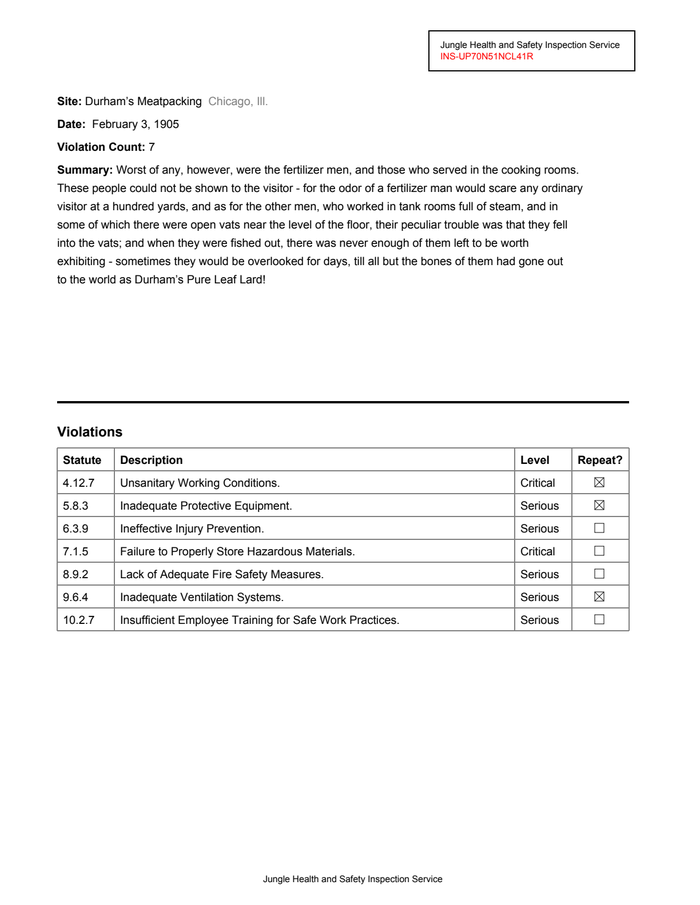

In [12]:
# Analyze using Table Transformer (TATR) - specialized for tables
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="docling")
page.find_all('region[model=docling]').highlight(group_by='region_type')
page.to_image(width=700)

Loaded layout model s3://layout/2025_02_18 on device mps with dtype torch.float16


Loaded table recognition model s3://table_recognition/2025_02_18 on device mps with dtype torch.float16


Recognizing layout:   0%|                                                                                                  | 0/1 [00:00<?, ?it/s]

Recognizing layout: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.07s/it]

Recognizing layout: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.08s/it]

Recognizing tables:   0%|                                                                                                  | 0/1 [00:00<?, ?it/s]

Recognizing tables: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.91s/it]

Recognizing tables: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.91s/it]

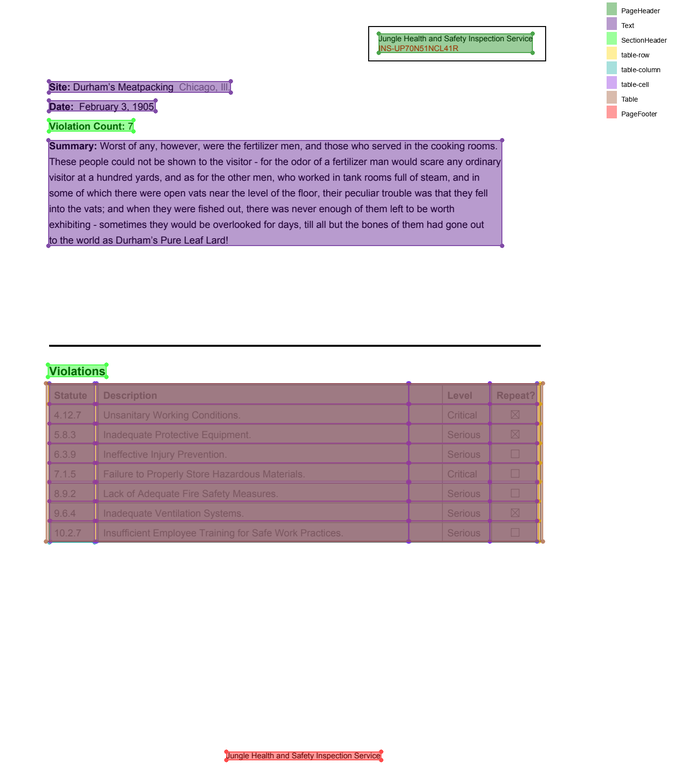

In [13]:
# Analyze using Table Transformer (TATR) - specialized for tables
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="surya")
page.find_all('region[model=surya]').highlight(group_by='region_type')
page.to_image(width=700)

*Note: Calling `analyze_layout` multiple times (even with the same engine) can add duplicate regions. You might want to use `page.clear_detected_layout_regions()` first, or filter by model using `region[model=yolo]`.* 

## Controlling Confidence Threshold

Filter detections by their confidence score.

In [14]:
# Re-run YOLO analysis (clearing previous results might be good practice)
page.clear_detected_layout_regions()
page.analyze_layout(engine="yolo")

# Find only high-confidence regions (e.g., >= 0.8)
high_conf_regions = page.find_all('region[confidence>=0.8]')
len(high_conf_regions)

image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmpxi5y4y2d/temp_layout_image.png: 1024x800 1 title, 3 plain texts, 2 abandons, 1 table, 3253.6ms


Speed: 5.6ms preprocess, 3253.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 800)


5

## Table Structure with TATR

The TATR engine provides detailed table structure elements (`table`, `table-row`, `table-column`, `table-column-header`). This is very useful for precise table extraction.

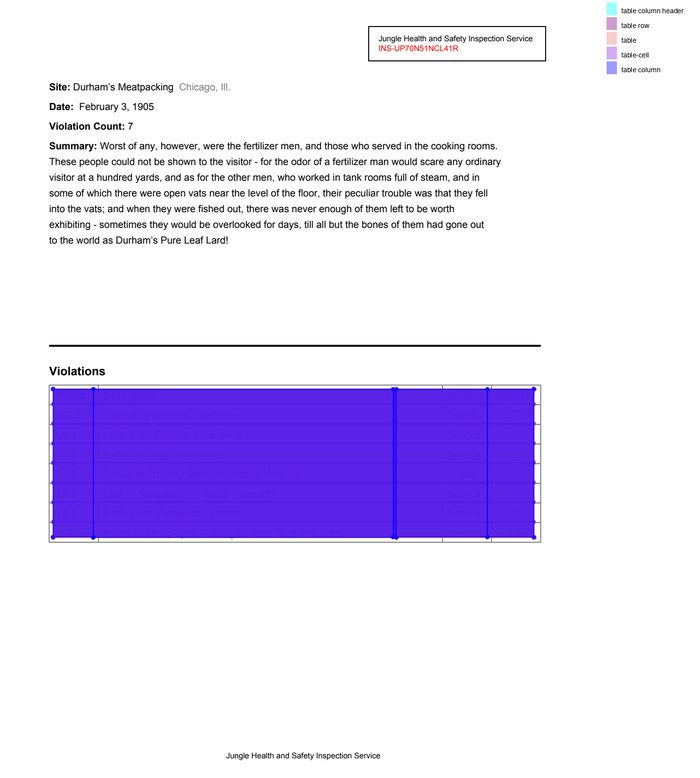

In [15]:
# Ensure TATR analysis has been run
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="tatr")
page.find_all('region[model=tatr]').highlight(group_by='region_type')
page.to_image(width=700)

In [16]:
# Find different structural elements from TATR
tables = page.find_all('region[type=table][model=tatr]')
rows = page.find_all('region[type=table-row][model=tatr]')
cols = page.find_all('region[type=table-column][model=tatr]')
hdrs = page.find_all('region[type=table-column-header][model=tatr]')

f"Found: {len(tables)} tables, {len(rows)} rows, {len(cols)} columns, {len(hdrs)} headers (from TATR)"

'Found: 2 tables, 8 rows, 4 columns, 1 headers (from TATR)'

### Enhanced Table Extraction with TATR

When a `region[type=table]` comes from the TATR model, `extract_table()` can use the underlying row/column structure for more robust extraction.

In [17]:
# Find the TATR table region again
tatr_table = page.find('region[type=table][model=tatr]')

# This extraction uses the detected rows/columns
tatr_table.extract_table()

[['Statute Description Level Repeat?'],
 ['Statute', 'Description', 'Level', 'Repeat?'],
 ['4.12.7', 'Unsanitary Working Conditions.', 'Critical', ''],
 ['5.8.3', 'Inadequate Protective Equipment.', 'Serious', ''],
 ['6.3.9', 'Ineffective Injury Prevention.', 'Serious', ''],
 ['7.1.5', 'Failure to Properly Store Hazardous Materials.', 'Critical', ''],
 ['8.9.2', 'Lack of Adequate Fire Safety Measures.', 'Serious', ''],
 ['9.6.4', 'Inadequate Ventilation Systems.', 'Serious', ''],
 ['10.2.7',
  'Insufficient Employee Training for Safe Work Practices.',
  'Serious',
  '']]

if you'd like the normal approach instead of the "intelligent" one, you can ask for pdfplumber.

In [18]:
# This extraction uses the detected rows/columns
tatr_table.extract_table(method='plumber')

[['Unsanitary Working Conditions.', 'Critical'],
 ['Inadequate Protective Equipment.', 'Serious'],
 ['Ineffective Injury Prevention.', 'Serious'],
 ['Failure to Properly Store Hazardous Materials.', 'Critical'],
 ['Lack of Adequate Fire Safety Measures.', 'Serious'],
 ['Inadequate Ventilation Systems.', 'Serious']]

## Next Steps

Layout analysis provides regions that you can use for:

- [Table Extraction](../tables/index.ipynb): Especially powerful with TATR regions.
- [Text Extraction](../text-extraction/index.ipynb): Extract text only from specific region types (e.g., paragraphs).
- [Document QA](../document-qa/index.ipynb): Focus question answering on specific detected regions.